In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [2]:
# Read Delve Compiled file

folder_path = r'C:\Users\Rafael_Fagundes\Downloads\delve_compiled_data.csv'

df = pd.read_csv(folder_path)

In [3]:
# Create ABM and LAL flag

conditions = [
    df['Media Buy Name'].str.contains('ABM', case=False),
    df['Media Buy Name'].str.contains('LAL', case=False)
]

values = ['ABM', 'LAL']

df['Audience Type Flag'] = np.select(conditions, values, default='0')

In [4]:
# Filter dataframe with B2B only

df_filtered = df[(df['BU'] == 'B2B') & (df['Audience Type Flag'] != '0') & (df['Country'] == 'United States')]

df_filtered['Audience Type Flag'].value_counts()

Audience Type Flag
ABM    46231
LAL    27047
Name: count, dtype: int64

In [5]:
# Group dataframe

df_grouped = df_filtered.groupby([
    'Audience Type Flag',
    'Fiscal Quarter',
    'Fiscal Week Year',
    'Country'
]).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum',
    'Net Rev': 'sum',
    'HVE': 'sum'  
}).reset_index()

In [6]:
# Create ROAS and CpHVE 

df_grouped['ROAS'] = df_grouped['Net Rev'] / df_grouped['Spend']
df_grouped['CpHVE'] = df_grouped['Spend'] / df_grouped['HVE']

<Axes: xlabel='Fiscal Quarter', ylabel='Impressions'>

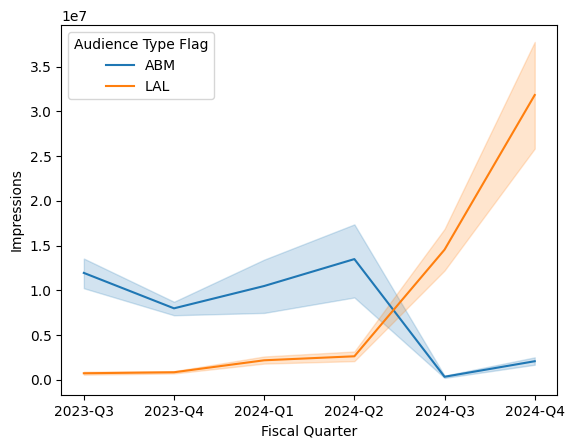

In [17]:
# Boxplot to analyze Impressions between ABM and LAL

sns.lineplot(data=df_grouped, x='Fiscal Quarter', y='Impressions', hue='Audience Type Flag')

<Axes: xlabel='Fiscal Quarter', ylabel='ROAS'>

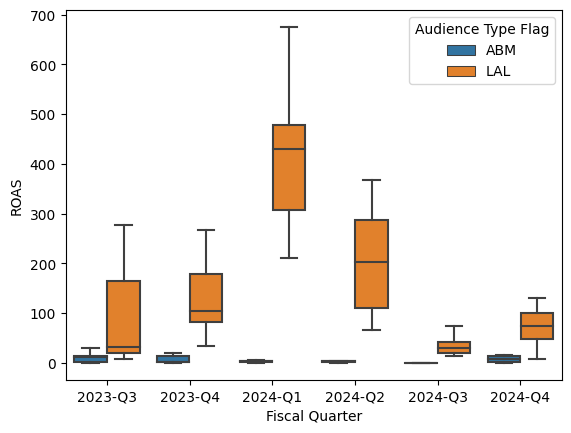

In [7]:
# Boxplot to analyze ROAS between ABM and LAL

sns.boxplot(data=df_grouped, x='Fiscal Quarter', y='ROAS', hue='Audience Type Flag', showfliers=False)

<Axes: xlabel='Fiscal Quarter', ylabel='HVE'>

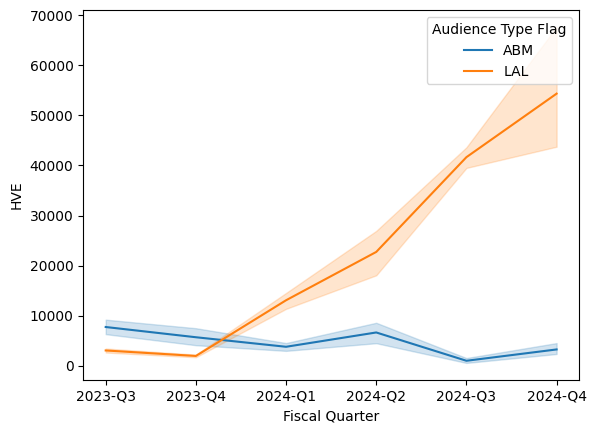

In [16]:
# Boxplot to analyze HVE between ABM and LAL

sns.lineplot(data=df_grouped, x='Fiscal Quarter', y='HVE', hue='Audience Type Flag')

<Axes: xlabel='Fiscal Quarter', ylabel='CpHVE'>

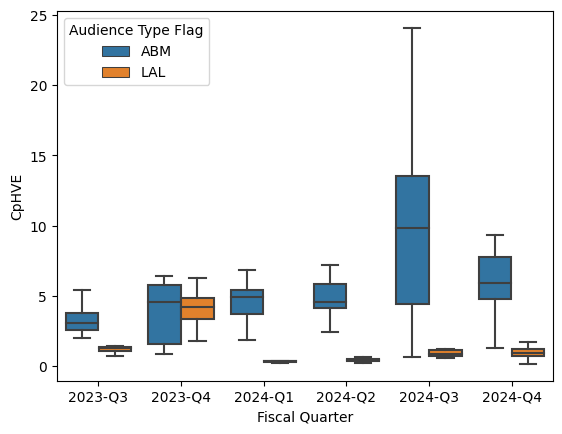

In [19]:
# Boxplot to analyze cpHVE between ABM and LAL

sns.boxplot(data=df_grouped, x='Fiscal Quarter', y='CpHVE', hue='Audience Type Flag', showfliers=False)

<Axes: xlabel='Fiscal Quarter', ylabel='Spend'>

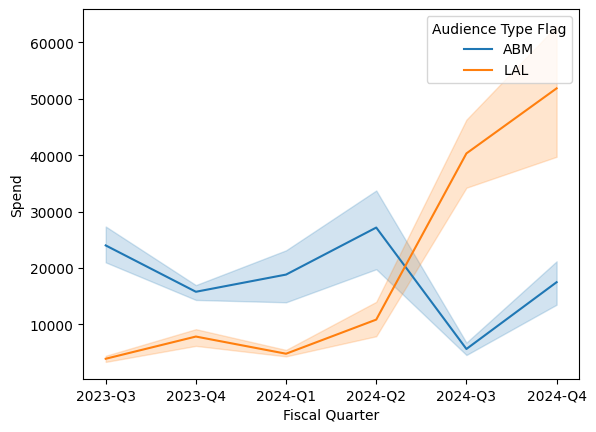

In [29]:
sns.lineplot(data=df_grouped, x='Fiscal Quarter', y='Spend', hue='Audience Type Flag')

In [30]:
df_grouped.to_csv('ABM vs LAL.csv')